<a href="https://colab.research.google.com/github/safacharfi/Network-Security-Covering-both-anomaly-and-intrusion-detection-systems/blob/main/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

# Importer les bibliothèques nécessaires

import pandas as pd

from sklearn.model_selection import train_test_split


In [ ]:
#importer data


# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# Load datasets from Google Drive
training_set = pd.read_csv('/content/drive/MyDrive/train_dataset.csv')
validation_set = pd.read_csv('/content/drive/MyDrive/val_dataset.csv')
testing_set = pd.read_csv('/content/drive/MyDrive/test_dataset.csv')


Mounted at /content/drive


In [ ]:
import os ;
os.listdir('/kaggle/input/dataset1')

['train_dataset.csv', 'test_dataset.csv', 'val_dataset.csv']

In [ ]:
import pandas as pd

# Load datasets from Kaggle input
training_set = pd.read_csv('/kaggle/input/dataset1/train_dataset.csv')
validation_set = pd.read_csv('/kaggle/input/dataset1/val_dataset.csv')
testing_set = pd.read_csv('/kaggle/input/dataset1/test_dataset.csv')


In [ ]:
# Séparer les caractéristiques et les étiquettes dans le jeu de données de test
X_test = testing_set.drop(columns=['Label'])
Y_test = testing_set['Label']

Y_test = Y_test.dropna()

X_test = X_test.loc[Y_test.index]

print("X_test shape:", X_test.shape)    # Should be (100, 31) after adjustments



X_test shape: (3999, 31)


In [ ]:
# Séparation des features (X) et de la variable cible (y)

X = training_set.drop('Label', axis=1)

y = training_set['Label']



# Vérifier les valeurs manquantes dans y

print("Nombre de valeurs NaN dans y:", y.isna().sum())



# Gérer les valeurs manquantes dans y (par exemple, en supprimant les lignes avec NaN)

y = y.dropna()



# Assurer que X et y sont alignés après suppression des NaN

X = X.loc[y.index]



# Séparer les données d'entraînement et de validation

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Taille de X_train: {X_train.shape[0]}, Taille de y_train: {y_train.shape[0]}")


Nombre de valeurs NaN dans y: 36914
Taille de X_train: 68659, Taille de y_train: 68659


#**1. Supervised ML Modeling**



**1. Decision Tree**

Utilisation de GridSearchCV pour tester différentes combinaisons d’hyperparamètres et sélectionner la meilleure via une validation croisée.


In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV, train_test_split



# Définir les hyperparamètres à tester

param_grid_dt = {

    'max_depth': [5, 10, 15, 20],

    'min_samples_split': [2, 5, 10],

    'min_samples_leaf': [1, 2, 4]

}



# Instancier le modèle Decision Tree

dt = DecisionTreeClassifier(random_state=42)



# Instancier GridSearchCV avec validation croisée à 5 plis

grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, n_jobs=-1, scoring='accuracy')



# Entraîner et tester

grid_search_dt.fit(X_train, y_train)

best_dt_model = grid_search_dt.best_estimator_



# Meilleurs hyperparamètres

print("Best parameters for Decision Tree:", grid_search_dt.best_params_)

print("Best Decision Tree accuracy:", grid_search_dt.best_score_)


Best parameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Decision Tree accuracy: 0.6788476454809583




**2. Random Forest**

Une forêt aléatoire est un ensemble d'arbres de décision. Chaque arbre est entraîné sur une sous-partie aléatoire des données et l'agrégation des résultats permet d'améliorer la performance globale tout en réduisant le risque de surapprentissage.




In [ ]:
from sklearn.ensemble import RandomForestClassifier



# Définir les hyperparamètres à tester

param_grid_rf = {

    'n_estimators': [100, 200],  # Nombre d'arbres dans la forêt

    'max_depth': [10, 20, 30], #Limite la profondeur de chaque arbre

    'min_samples_split': [2, 5, 10],

    'min_samples_leaf': [1, 2, 4]

}



# Instancier le modèle Random Forest

rf = RandomForestClassifier(random_state=42)



# Instancier GridSearchCV

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='accuracy')



# Entraîner et tester

grid_search_rf.fit(X_train, y_train)

best_rf_model = grid_search_rf.best_estimator_



# Meilleurs hyperparamètres

print("Best parameters for Random Forest:", grid_search_rf.best_params_)

print("Best Random Forest accuracy:", grid_search_rf.best_score_)


/usr/local/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest accuracy: 0.6790369831910092


**4. K-Nearest Neighbors (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier



# Définir les hyperparamètres à tester

param_grid_knn = {

    'n_neighbors': [3, 5, 7, 9],

    'weights': ['uniform', 'distance'],

    'metric': ['euclidean', 'manhattan']

}



# Instancier le modèle KNN

knn = KNeighborsClassifier()



# Instancier GridSearchCV

grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, n_jobs=-1, scoring='accuracy')



# Entraîner et tester

grid_search_knn.fit(X_train, y_train)

best_knn_model = grid_search_knn.best_estimator_



# Meilleurs hyperparamètres

print("Best parameters for KNN:", grid_search_knn.best_params_)

print("Best KNN accuracy:", grid_search_knn.best_score_)


Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Best KNN accuracy: 0.6355612383103306


/usr/local/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


**5. Gradient Boosting (XGBoost)**

In [ ]:
pip install xgboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 3.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from xgboost import XGBClassifier



# Définir les hyperparamètres à tester

param_grid_xgb = {

    'n_estimators': [100, 200],

    'max_depth': [3, 6, 9],

    'learning_rate': [0.01, 0.1, 0.2],

    'subsample': [0.8, 1.0]

}



# Instancier le modèle XGBoost

xgb = XGBClassifier(random_state=42)



# Instancier GridSearchCV

grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, n_jobs=-1, scoring='accuracy')



# Entraîner et tester

grid_search_xgb.fit(X_train, y_train)

best_xgb_model = grid_search_xgb.best_estimator_



# Meilleurs hyperparamètres

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

print("Best XGBoost accuracy:", grid_search_xgb.best_score_)


Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best XGBoost accuracy: 0.6791534982969237


#**2. Unsupervised ML Modeling**

**2.1. K-Means Clustering**


Silhouette Score for K-Means: 0.9930752706269508


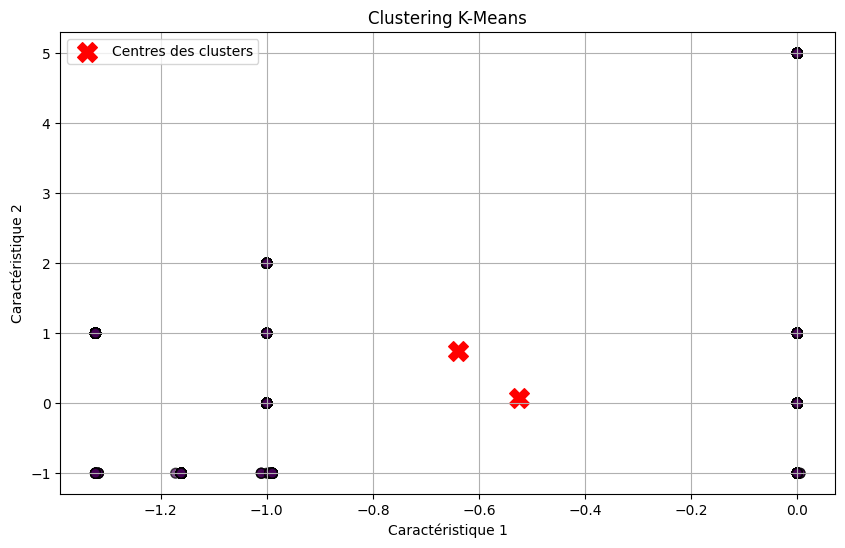

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score





# Appliquer K-Means

kmeans_model = KMeans(n_clusters=2, random_state=42)

kmeans_model.fit(X_train)

y_pred_kmeans = kmeans_model.predict(X_test)



# Calculer le Silhouette Score

silhouette_avg = silhouette_score(X_test, y_pred_kmeans)

print(f"Silhouette Score for K-Means: {silhouette_avg}")



# Visualisation des résultats

plt.figure(figsize=(10, 6))



# Tracer les points de données avec les couleurs des clusters

plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred_kmeans, s=50, cmap='viridis', edgecolor='k', alpha=0.7)



# Tracer les centres des clusters

centers = kmeans_model.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centres des clusters')



plt.title('Clustering K-Means')

plt.xlabel('Caractéristique 1')

plt.ylabel('Caractéristique 2')

plt.legend()

plt.grid()

plt.show()


**2.2. DBSCAN**

DBSCAN Results:
Labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, -1}


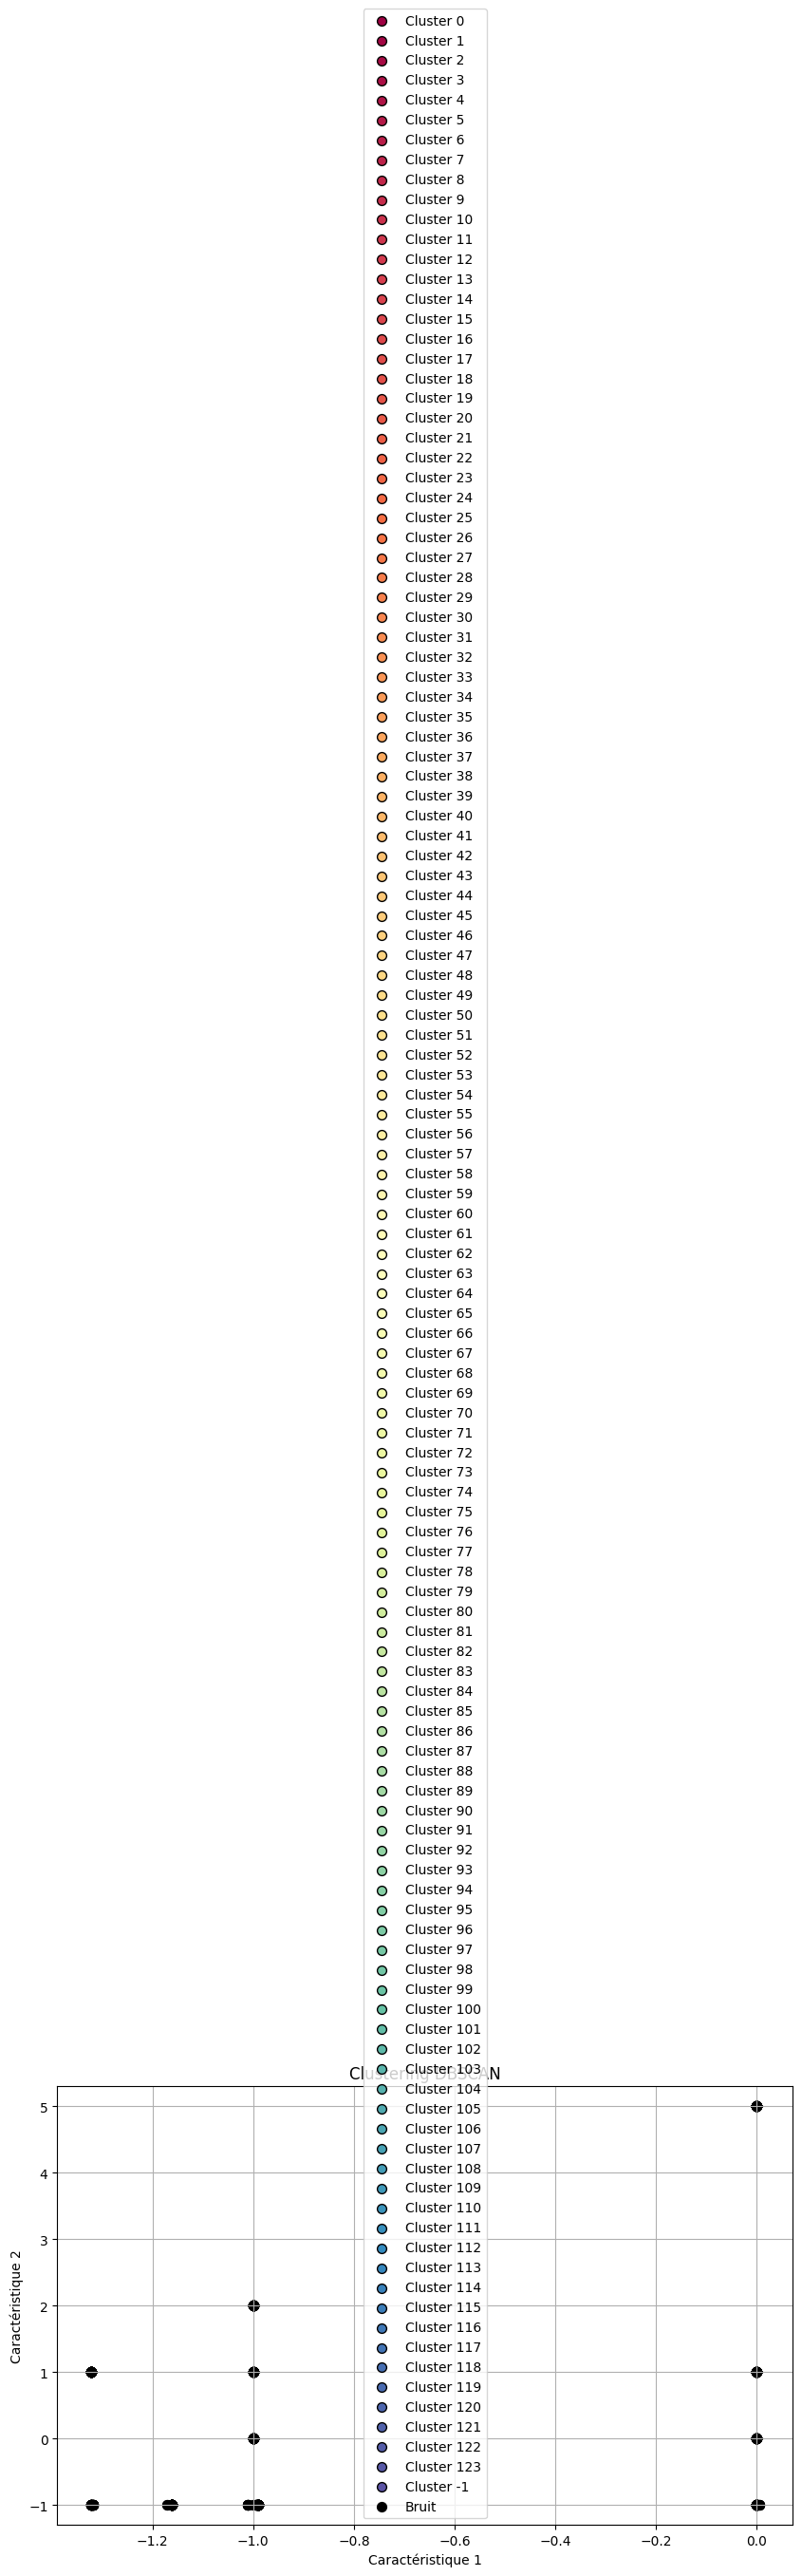

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

from sklearn.cluster import DBSCAN



# Appliquer DBSCAN

dbscan_model = DBSCAN(eps=0.3, min_samples=10)

y_pred_dbscan = dbscan_model.fit_predict(X_test)



# Afficher les résultats de DBSCAN

print("DBSCAN Results:")

print(f"Labels: {set(y_pred_dbscan)}")



# Visualisation des résultats

plt.figure(figsize=(10, 6))



# Définir les couleurs pour les points

# Les points de bruit sont marqués par -1

unique_labels = set(y_pred_dbscan)

colors = [plt.cm.Spectral(float(i) / len(unique_labels)) for i in range(len(unique_labels))]



# Tracer les points

for k, col in zip(unique_labels, colors):

    class_member_mask = (y_pred_dbscan == k)



    # Tracer les points qui ne sont pas considérés comme bruit

    plt.scatter(X_test.iloc[class_member_mask, 0], X_test.iloc[class_member_mask, 1], color=col, s=50, edgecolor='k', label=f'Cluster {k}')



# Mettre en surbrillance les points de bruit

noise_mask = (y_pred_dbscan == -1)

plt.scatter(X_test.iloc[noise_mask, 0], X_test.iloc[noise_mask, 1], color='black', s=50, edgecolor='k', label='Bruit')



plt.title('Clustering DBSCAN')

plt.xlabel('Caractéristique 1')

plt.ylabel('Caractéristique 2')

plt.legend()

plt.grid()

plt.show()


**2.3. Isolation Forest**


Anomaly Detection Rate for Isolation Forest: 0.27750741388487565


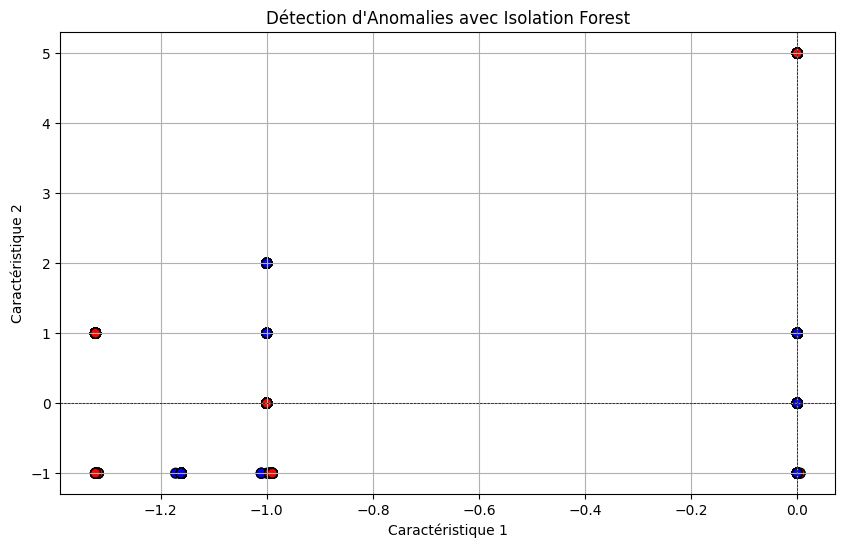

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.ensemble import IsolationForest

from sklearn.datasets import make_blobs





# Appliquer Isolation Forest

iso_forest = IsolationForest(contamination=0.1, random_state=42)

iso_forest.fit(X_train)



# Prédictions

y_pred_if = iso_forest.predict(X_test)



# Taux de détection des anomalies

anomaly_rate = sum(y_pred_if == -1) / len(y_pred_if)

print(f"Anomaly Detection Rate for Isolation Forest: {anomaly_rate}")



# Visualisation des résultats

plt.figure(figsize=(10, 6))



# Définir les couleurs pour les points

colors = np.where(y_pred_if == -1, 'red', 'blue')  # Rouge pour anomalies, bleu pour les données normales



# Tracer les points

plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], color=colors, s=50, edgecolor='k')



plt.title('Détection d\'Anomalies avec Isolation Forest')

plt.xlabel('Caractéristique 1')

plt.ylabel('Caractéristique 2')

plt.axhline(0, color='black', lw=0.5, ls='--')  # Ligne horizontale pour référence

plt.axvline(0, color='black', lw=0.5, ls='--')  # Ligne verticale pour référence

plt.grid()

plt.show()


**2.4. One-Class SVM**


One-Class SVM Results:
Anomaly labels: {1, -1}


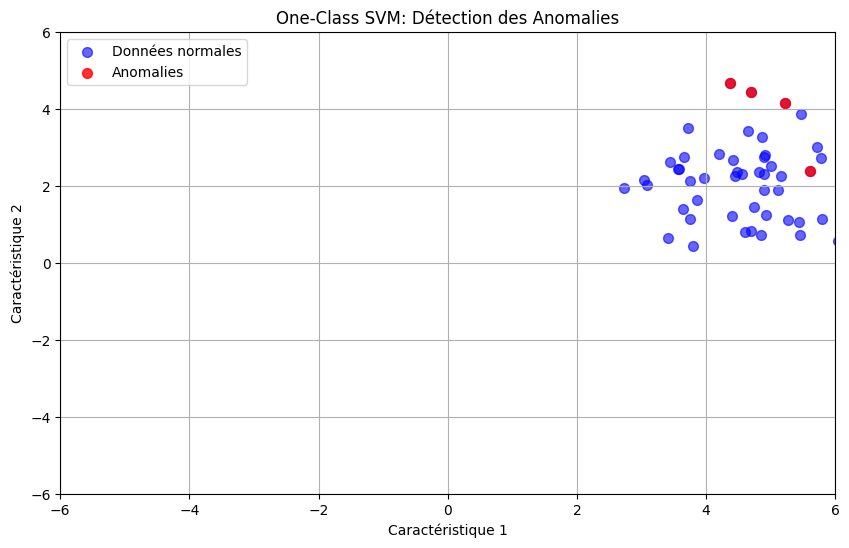

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import OneClassSVM

# Créer un jeu de données factice
X_train, _ = make_blobs(n_samples=300, centers=2, random_state=42, cluster_std=1.0)
X_test, _ = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.0)

# Entraîner One-Class SVM
one_class_svm = OneClassSVM(gamma='auto', nu=0.1)
one_class_svm.fit(X_train)

# Prédictions
y_pred_ocs = one_class_svm.predict(X_test)

# Afficher les résultats
print("One-Class SVM Results:")
print(f"Anomaly labels: {set(y_pred_ocs)}")

# Visualisation des résultats
plt.figure(figsize=(10, 6))

# Tracer les points de données normales
plt.scatter(X_test[:, 0], X_test[:, 1], c='blue', s=50, label='Données normales', alpha=0.6)

# Tracer les anomalies
anomalies = X_test[y_pred_ocs == -1]
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', s=50, label='Anomalies', alpha=0.8)

# Configuration du graphique
plt.title('One-Class SVM: Détection des Anomalies')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')
plt.legend()
plt.grid()
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.show()


#**3 - Evaluation des Modèles de ML**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def evaluate_model(y_true, y_pred, y_pred_prob=None, model_name="Model"):

    # Calcul des métriques de performance

    accuracy = accuracy_score(y_true, y_pred)

    precision = precision_score(y_true, y_pred, average='binary')  # Pour les classes binaires

    recall = recall_score(y_true, y_pred, average='binary')

    f1 = f1_score(y_true, y_pred, average='binary')



    # Affichage des résultats

    print(f"Evaluation of {model_name}:")

    print(f"Accuracy: {accuracy:.4f}")

    print(f"Precision: {precision:.4f}")

    print(f"Recall: {recall:.4f}")

    print(f"F1-Score: {f1:.4f}")



    # Matrice de confusion

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6,6))

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Anomalie'], yticklabels=['Normal', 'Anomalie'])

    plt.title(f"Confusion Matrix for {model_name}")

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

    plt.show()



    # ROC-AUC curve (si les probabilités sont disponibles)

    if y_pred_prob is not None:

        roc_auc = roc_auc_score(y_true, y_pred_prob)

        fpr, tpr, _ = roc_curve(y_true, y_pred_prob)

        plt.figure(figsize=(8, 6))

        plt.plot(fpr, tpr, color='blue', label=f"ROC-AUC = {roc_auc:.4f}")

        plt.plot([0, 1], [0, 1], 'k--')

        plt.xlabel("False Positive Rate")

        plt.ylabel("True Positive Rate")

        plt.title(f"ROC-AUC Curve for {model_name}")

        plt.legend(loc='best')

        plt.show()


Evaluation pour le Decision Tree

Evaluation of Decision Tree:
Accuracy: 0.6809
Precision: 0.6812
Recall: 0.9989
F1-Score: 0.8100


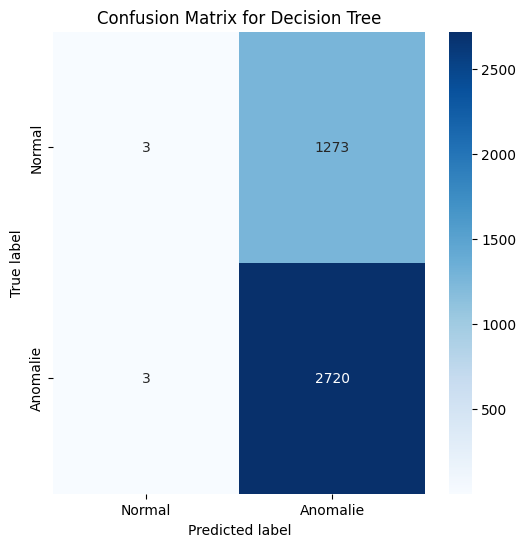

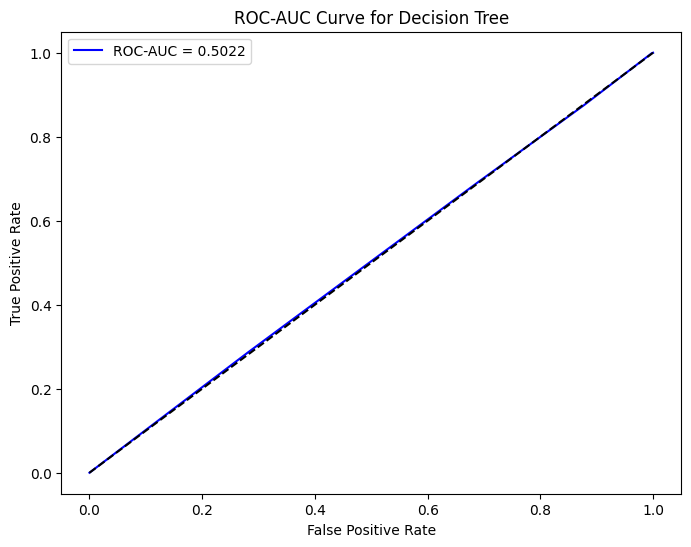

In [ ]:
# Prédiction des classes

y_pred_dt = best_dt_model.predict(X_test)



# Si disponible, prédiction des probabilités (nécessaire pour ROC-AUC)

y_pred_prob_dt = best_dt_model.predict_proba(X_test)[:, 1]



# Évaluation du modèle Decision Tree

evaluate_model(Y_test, y_pred_dt, y_pred_prob_dt, model_name="Decision Tree")


Evaluation pour le Random Forest

Evaluation of Random Forest:
Accuracy: 0.6809
Precision: 0.6812
Recall: 0.9989
F1-Score: 0.8100


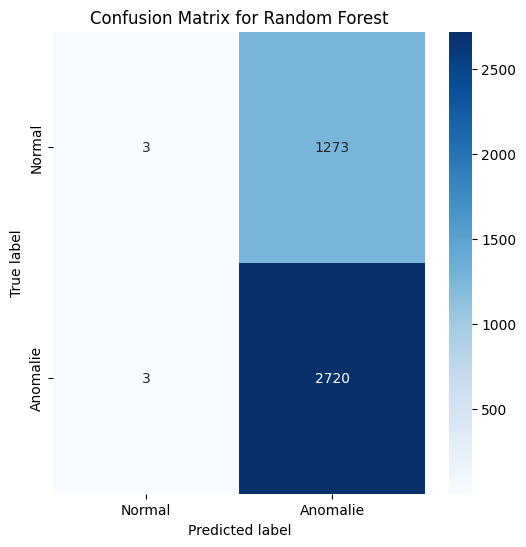

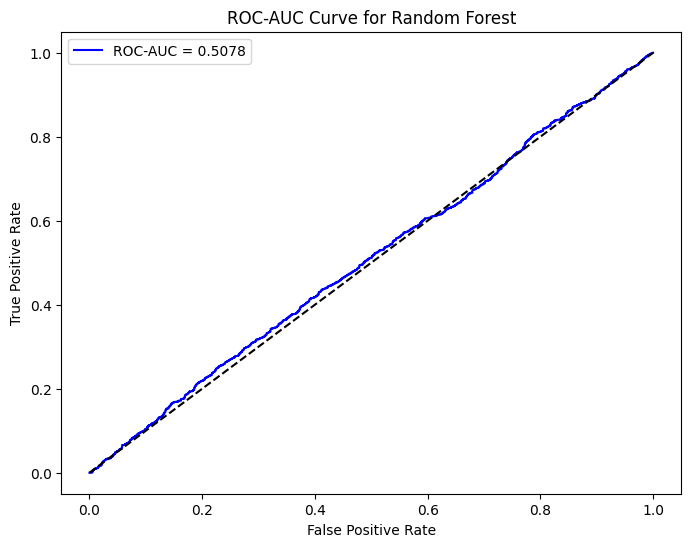

In [ ]:
y_pred_rf = best_rf_model.predict(X_test)

y_pred_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]

evaluate_model(Y_test, y_pred_rf, y_pred_prob_rf, model_name="Random Forest")


Evaluation pour SVM


In [ ]:
y_pred_svm = best_svm_model.predict(X_test)

# SVM avec `probability=True`

y_pred_prob_svm = best_svm_model.predict_proba(X_test)[:, 1] if hasattr(best_svm_model, "predict_proba") else None

evaluate_model(y_test, y_pred_svm, y_pred_prob_svm, model_name="SVM")


Evaluation pour KNN


Evaluation of KNN:
Accuracy: 0.6257
Precision: 0.6774
Recall: 0.8597
F1-Score: 0.7577


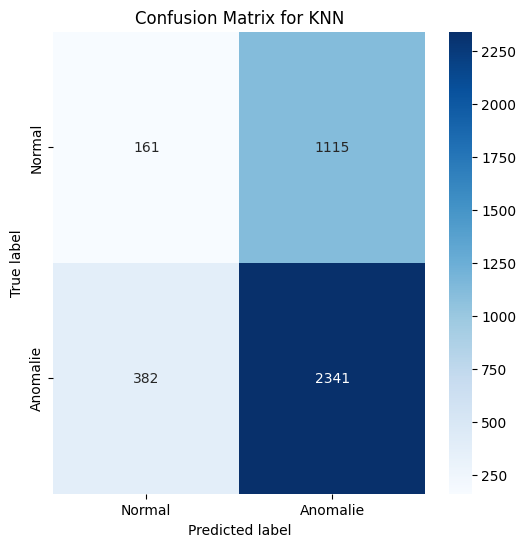

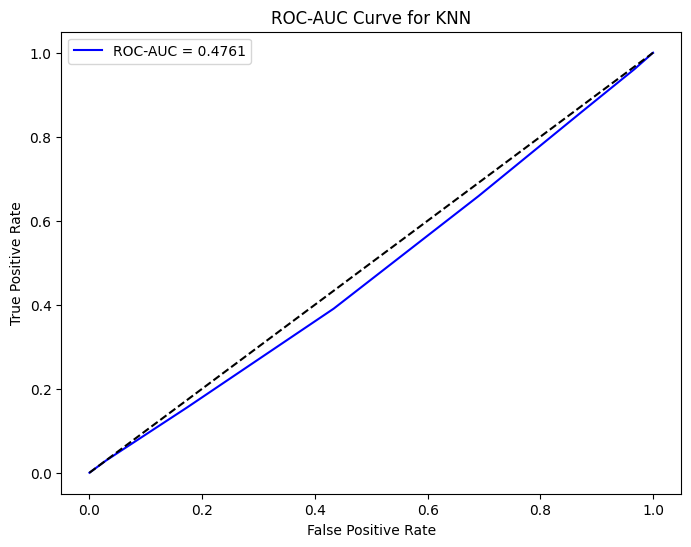

In [ ]:
y_pred_knn = best_knn_model.predict(X_test)

y_pred_prob_knn = best_knn_model.predict_proba(X_test)[:, 1]

evaluate_model(Y_test, y_pred_knn, y_pred_prob_knn, model_name="KNN")


Evaluation pour XGBoost


Evaluation of XGBoost:
Accuracy: 0.6809
Precision: 0.6809
Recall: 1.0000
F1-Score: 0.8102


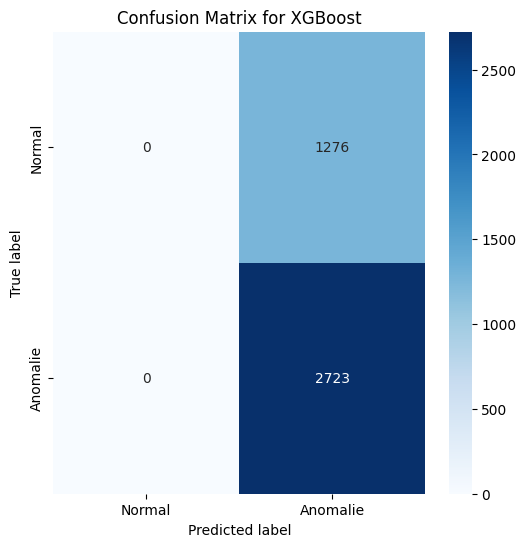

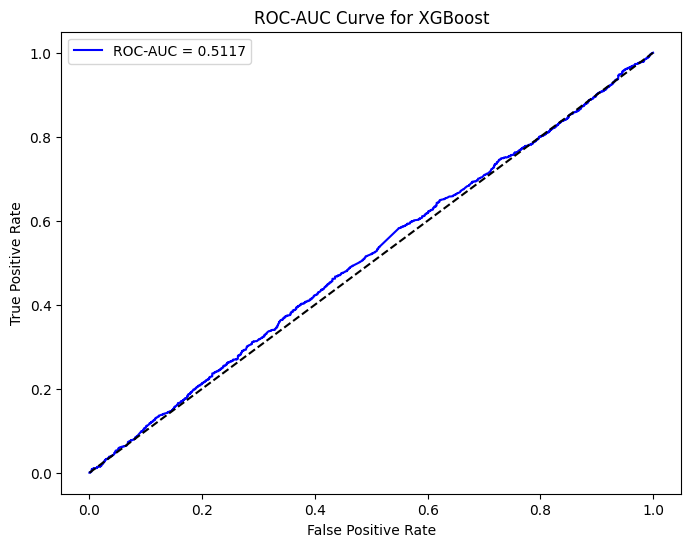

In [ ]:
y_pred_xgb = best_xgb_model.predict(X_test)

y_pred_prob_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

evaluate_model(Y_test, y_pred_xgb, y_pred_prob_xgb, model_name="XGBoost")


**Comparaison des modèles**

In [ ]:
import pandas as pd



# Fonction d'évaluation pour chaque modèle

def evaluate_and_store_results(model, X_test, Y_test, model_name, results):

    # Prédiction des classes

    y_pred = model.predict(X_test)



    # Calcul des métriques

    accuracy = accuracy_score(Y_test, y_pred)

    precision = precision_score(Y_test, y_pred, average='binary')

    recall = recall_score(Y_test, y_pred, average='binary')

    f1 = f1_score(Y_test, y_pred, average='binary')



    # ROC-AUC (si les probabilités sont disponibles)

    if hasattr(model, "predict_proba"):

        y_pred_prob = model.predict_proba(X_test)[:, 1]

        roc_auc = roc_auc_score(Y_test, y_pred_prob)

    else:

        roc_auc = None  # Non applicable pour certains modèles comme SVM sans probability=True



    # Stockage des résultats dans un dictionnaire

    results[model_name] = {

        "Accuracy": accuracy,

        "Precision": precision,

        "Recall": recall,

        "F1-Score": f1,

        "ROC-AUC": roc_auc

    }



# Liste des modèles entraînés

models = {

    "Decision Tree": best_dt_model,

    "Random Forest": best_rf_model,

    "KNN": best_knn_model,

    "XGBoost": best_xgb_model

}



# Stockage des résultats

results = {}



# Évaluer chaque modèle et stocker les résultats

for model_name, model in models.items():

    evaluate_and_store_results(model, X_test, Y_test, model_name, results)



# Affichage des résultats dans un tableau pandas

df_results = pd.DataFrame(results).T  # Transposition pour une meilleure présentation

df_results.fillna('N/A', inplace=True)  # Remplacement des valeurs manquantes

print(df_results)


               Accuracy  Precision    Recall  F1-Score   ROC-AUC
Decision Tree  0.680920   0.681192  0.998898  0.810006  0.502226
Random Forest  0.680920   0.681192  0.998898  0.810006  0.507828
KNN            0.625656   0.677373  0.859714  0.757728  0.476053
XGBoost        0.680920   0.680920  1.000000  0.810176  0.511747


#**4. Deep Learning Modeling**


**Multi-Layer Perceptron (MLP)**

In [ ]:
# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping


# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Créer le modèle MLP
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))  # Couche d'entrée
model.add(Dense(64, activation='relu'))  # Couche cachée
model.add(Dense(32, activation='relu'))  # Couche cachée
model.add(Dense(1, activation='sigmoid'))  # Couche de sortie (pour une classification binaire)

# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Configurer EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entraîner le modèle
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stopping])

# Évaluer le modèle sur l'ensemble de validation
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Loss sur l\'ensemble de validation: {val_loss:.4f}, Précision: {val_accuracy:.4f}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6751 - loss: 0.6356 - val_accuracy: 0.6831 - val_loss: 0.6265
Epoch 2/100
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6790 - loss: 0.6291 - val_accuracy: 0.6827 - val_loss: 0.6273
Epoch 3/100
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6794 - loss: 0.6283 - val_accuracy: 0.6831 - val_loss: 0.6250
Epoch 4/100
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6806 - loss: 0.6269 - val_accuracy: 0.6831 - val_loss: 0.6252
Epoch 5/100
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6787 - loss: 0.6281 - val_accuracy: 0.6831 - val_loss: 0.6252
Epoch 6/100
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6756 - loss: 0.6304 - val_accuracy: 0.6831 - val_loss: 0.6247
Epoch 7/100
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6797 - loss: 0.6272 - val_accuracy: 0.6831 - val_loss: 0.6246
Epoch 8/100
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6801 - loss: 0